In [13]:
from math import sin, cos, pi, sqrt, e, log, isclose, exp
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm, pyplot as plt

import h5py
from scipy.constants import epsilon_0, mu_0
import scipy.constants

We want to quickly determine how effective dipole phased-array focusing will actually be; 

This is essentially \cite{Analysis2000}; however, the radiation pattern of the waveguide applicators is not particularly appropriate for this problem.



A half-wave dipole is used. \cite{Halfwave}  \cite{Analysis2013}



We define the following notation:
    
    
$\vec{K_{focal}}$ (X, 0, Z) is that from element k to the focal point

the focal point itself is $\vec{A_{focal}}$

The vector $\vec{K_{sample}}$ is that from element k to the sample point




https://en.wikipedia.org/wiki/Dipole_antenna:

$${\displaystyle E_{\theta }={\frac {\zeta _{0}I_{0}}{2\pi r}}{\frac {\cos \left({\frac {\pi }{2}}\cos \theta \right)}{\sin \theta }}\sin {(\omega t - (\phi_{focus} - \phi_{sample})}.}$$

k is the spatial wavenumber 

$$P_{\text{total}}={\frac {1}{2}}I_{0}^{2}R_{\text{radiation}}$$

$$\sqrt{\frac{P_{\text{total}}}{{\frac {1}{2}}R_{\text{radiation}}}}=I_{0}$$

where ${\displaystyle R_{\text{radiation}}\approx 73.1\ \Omega .}$

To first simplify for the 2D case, 

$${\displaystyle E_{\theta }={\frac {\zeta _{0}I_{0}}{2\pi R}}}{\sin {((2 \pi f) t - (\phi_{foc} - \phi_{sample})}.}$$

$$\phi = k L$$

In [8]:
The electric field at the point is {the sum over { each antenna's field * { the lengths of each radius in  } } }

SyntaxError: invalid syntax (<ipython-input-8-de5dfacd19f6>, line 1)


Tissue thickness is T_z

$$k_{tissue} = 2 pi f \sqrt{\epsilon_r \epsilon_0 \mu_r \mu_0}$$

the length in each tissue is $$\frac{|K_{focal}|}{K_{focal[Z]}} (L_t)$$


$$  \phi_{focal[K]} = \sum_{tissue}{k_{tissue} \frac{|K_{focal}|}{K_{focal[Z]}} (L_{tissue})}$$

Similarly, attenuation $\alpha$ due to electric field penetration depth $\gamma_{tissue}$, is 

$$ \alpha =  \left|_{tissue=0} {\exp(- \gamma_{tissue} \frac{|K_{sample}|}{K_{sample[Z]}} (L_{tissue}))} \right. $$

$$ \beta =  \left|_{tissue=0} \eta_{tissue+1} \right. $$

where $\eta$ is the refractive indice.

In [44]:
For a single tissue, that's 

antenna_resistance = 73.1

I = sqrt(power / (0.5 * antenna_resistance))

k_x = (-1.0*spacing*((max_k-1)/2.0))+(k*spacing)

D_focal = sqrt((k_x**2.0) + (0-focal_z)**2.0) - sqrt(focal_z**2.0)

D_sample = sqrt((sample_x-k_x)**2 + (sample_z)**2)

alpha = exp(-1.0 * (D_sample / tissue_gamma))

k_tissue = 2 * pi * f * sqrt(eps_0 * eps_tissue * mu_0)

E_k = 1.0/(2.0 * pi) * eta * I * 1.0/(D_sample) * sin((k_tissue * D_focal) - (k_tissue * D_sample)) * alpha

E = sum(E_k, k, 0, max_k)

sum1: sum(1/x^2, x, 1, inf);


SyntaxError: invalid syntax (<ipython-input-44-d3a3cb458473>, line 1)

What amplitude weighting should we use? We're not super concerned about sidelobes, just getting the maximum power; therefore I think flat will be fine.

[6.47399519e+03 2.38922530e+04 3.04184824e+04 2.64976066e+04
 1.85875702e+04 1.45443946e+04 1.84490072e+04 2.81623642e+04
 3.68667399e+04 3.72804187e+04 2.58190941e+04 4.41184321e+03
 2.06375108e+04 4.16793041e+04 5.28723994e+04 5.20982886e+04
 4.12086893e+04 2.49749820e+04 9.40742184e+03 1.02039030e+01
 1.28127103e+02 1.00076122e+04 2.61601171e+04 4.21842372e+04
 5.08944381e+04 4.74912763e+04 3.23874726e+04 1.18515768e+04
 4.59836430e+03 9.16113164e+03 2.65838969e+02 1.64174796e+04
 3.14393717e+04 3.73316342e+04 3.27007079e+04 2.18479402e+04
 1.05130756e+04 1.33379573e+03 7.26638960e+03 1.79998848e+04
 3.03403166e+04 3.90478529e+04 3.75105817e+04 2.36686156e+04
 3.65347868e+03 1.05001715e+04 8.31462300e+03 1.15090719e+04
 3.90182739e+04 5.85547899e+04 5.85547899e+04 3.90182739e+04
 1.15090719e+04 8.31462300e+03 1.05001715e+04 3.65347868e+03
 2.36686156e+04 3.75105817e+04 3.90478529e+04 3.03403166e+04
 1.79998848e+04 7.26638960e+03 1.33379573e+03 1.05130756e+04
 2.18479402e+04 3.270070

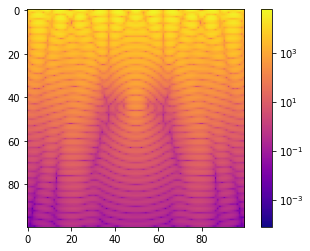

In [267]:
def linear_single_tissue_E_test(sample_x, sample_z, focal_z, tissue_gamma, eps_tissue, max_k, spacing, f, power):
    E = 0
    
    antenna_resistance = 73.1
    eta = scipy.constants.value("characteristic impedance of vacuum")

    for k in range(0, max_k):
        
        k_x = (-1.0*spacing*((max_k-1)/2.0))+(k*spacing)
        
        D_focal = np.sqrt((k_x**2.0) + (0-focal_z)**2.0) - np.sqrt(focal_z**2.0)

        D_sample = np.sqrt((sample_x-k_x)**2 + (sample_z)**2)

        
        alpha = np.exp(-1.0 * (D_sample/ tissue_gamma))
        

        I = np.sqrt(power / (0.5 * antenna_resistance))

        
        k_tissue = 2 * pi * f * np.sqrt(epsilon_0 * eps_tissue * mu_0)

        E_k = 1.0/(2.0 * pi) * eta * I * 1.0/(D_sample) * np.sin((k_tissue * D_focal) - (k_tissue * D_sample)) * alpha
        
        E += E_k
        
    return E

focal_z = 0.04
sample_x = 0
sample_z = focal_z
tissue_gamma = 0.007
eps_tissue = 50.0
max_k = 10

f = 9e9
power = 20000.0

k_tissue = 2 * pi * f * np.sqrt(epsilon_0 * eps_tissue * mu_0)


# spacing = 1.0/k_tissue
spacing = 0.01
# spacing = np.linspace(1.0/10000.0, 1.0/10, 50)
# print(spacing)





sample_x = np.linspace(-focal_z, focal_z, 100)
sample_z = np.linspace(focal_z*0.25, focal_z*2, 100)

sample_x, sample_z = np.meshgrid(sample_x, sample_z)


E = linear_single_tissue_E_test(sample_x, sample_z, focal_z, tissue_gamma, eps_tissue, max_k, spacing, f, power)

E = np.abs(E)

print(E[0], E[np.shape(E)[0]//2])

# print(E[:][0])

# plt.plot(spacing, E[:])

fig, ax = plt.subplots()
cs = ax.imshow(E, cmap=cm.plasma, norm=colors.LogNorm())
cbar = fig.colorbar(cs)

# plt.plot(E)



# Personal phased array 

A much better amplitude weighting would be better.

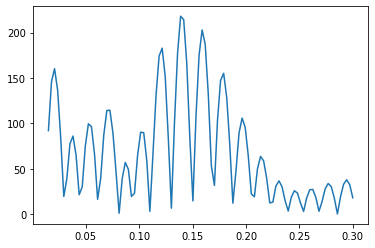

In [408]:
focal_z = 0.15
sample_x = 0
sample_z = focal_z
tissue_gamma = 100000
eps_tissue = 1.0
max_k = 40

f = 9e9
element_power = 0.010 #per element

k_tissue = 2 * pi * f * np.sqrt(epsilon_0 * eps_tissue * mu_0)


spacing = 0.01
# spacing = np.linspace(1.0/10000.0, 1.0/10, 50)
# print(spacing)

# sample_x = np.linspace(-focal_z, focal_z, 100)
sample_z = np.linspace(focal_z*0.1, focal_z*2, 100)

# sample_x, sample_z = np.meshgrid(sample_x, sample_z)

E = linear_single_tissue_E_test(sample_x, sample_z, focal_z, tissue_gamma, eps_tissue, max_k, spacing, f, element_power)

E = np.abs(E)

# fig, ax = plt.subplots()
# cs = ax.imshow(E, cmap=cm.plasma, norm=colors.LogNorm())
# cbar = fig.colorbar(cs)

plt.plot(sample_z, E)


Peak electric field at 0.0006 m:  844.2975148626625


Text(0.5, 0, 'X position (m)')

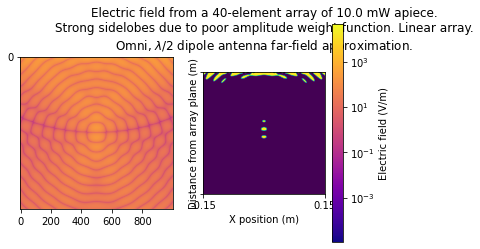

In [426]:

sample_x = np.linspace(-focal_z, focal_z, 1000)
sample_z = np.linspace(0, focal_z*2, 1000)

sample_x, sample_z = np.meshgrid(sample_x, sample_z)

E = linear_single_tissue_E_test(sample_x, sample_z, focal_z, tissue_gamma, eps_tissue, max_k, spacing, f, element_power)

E = np.abs(E)



fig, (ax, ax1) = plt.subplots(1, 2, sharey=True)

cs = ax.imshow(E, cmap=cm.plasma, norm=colors.LogNorm())
cbar = fig.colorbar(cs)
cbar.set_label("Electric field (V/m)")
labels = np.zeros_like(sample_x)

print(f"Peak electric field at {4*(focal_z / 1000)} m: ", np.max(E[4:-1, :]))

#NOTE: 
# This peak electric field is sampled at a distance of 0.6 mm from the elements.
# Such an approximation is not valid; near-field effects take firm hold.


E[np.nonzero(E < 171.0)] = 0
E[np.nonzero(E > 171.0)] = 1

ax1.imshow(E)

plt.yticks([0,1000], labels = [0, str(focal_z*2)])
plt.ylabel("Distance from array plane (m)")

plt.title(f"Electric field from a {max_k}-element array of {element_power*1000.0} mW apiece.\n"
                "Strong sidelobes due to poor amplitude weight function. Linear array.\n"
                  "Omni, $\lambda / 2$ dipole antenna far-field approximation.\n")
plt.xticks([0,1000], labels = [str(-focal_z), str(focal_z)])
plt.xlabel("X position (m)")


In [ ]:
heck yeah, I love 'maxima'.